In [217]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [218]:
comments = pd.read_csv("../data/vtaiwan/comments_translated.csv")
comments.head()

,timestamp,datetime,comment-id,author-id,agrees,disagrees,moderated,comment-body,translated_comment
0,1436965020,Wed Jul 15 2015 12:57:00 GMT+0000 (Coordinated...,18,0,351,351,1,我覺得UberX目前未依法營業，讓我覺得搭乘時有風險。,I feel that UberX is not currently operating i...
1,1436965031,Wed Jul 15 2015 12:57:11 GMT+0000 (Coordinated...,19,0,365,327,1,我覺得UberX管理制度不夠透明，讓我難以安心。,I feel that UberX’s management system is not t...
2,1436965038,Wed Jul 15 2015 12:57:18 GMT+0000 (Coordinated...,21,0,505,186,1,我覺得UberX應該依法令申請經營運輸業務。,I think UberX should apply to operate transpor...
3,1436965034,Wed Jul 15 2015 12:57:14 GMT+0000 (Coordinated...,20,0,312,385,1,我覺得UberX已與現有國內運輸業產生不公平競爭的情形。,I feel that UberX has created unfair competiti...
4,1437097446,Fri Jul 17 2015 01:44:06 GMT+0000 (Coordinated...,22,88,1,0,-1,我覺得每位司機都該投保乘客責任險,I think every driver should have passenger lia...


In [219]:
votes = pd.read_csv("../data/vtaiwan/participant-votes.csv")
votes.head()

,participant,group-id,n-comments,n-votes,n-agree,n-disagree,0,1,2,3,...,189,190,191,192,193,194,195,196,197,198
0,0,0.0,46,101,44,12,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,29,14,10,1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.0,5,88,58,15,1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,0,31,13,16,1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0,0,11,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
votes_matrix = votes.set_index("participant").iloc[:, 5:]
votes_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
participant,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,-1.0,-1.0,1.0,1.0,0.0,-1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


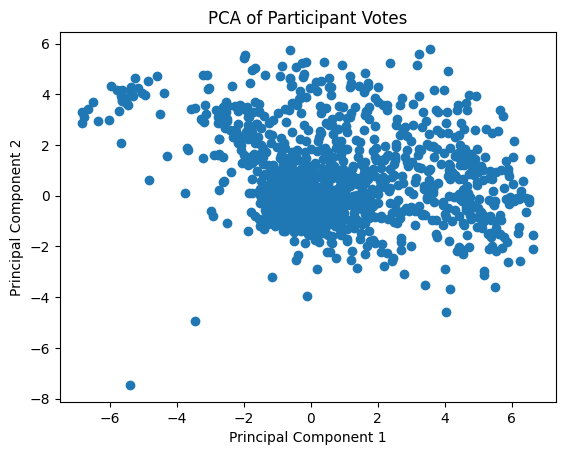

In [221]:
def decompose_votes(vote_matrix: np.ndarray, num_components: int = 2):
    pca = PCA(n_components=num_components)

    vote_matrix_nonan = np.nan_to_num(vote_matrix, nan=0)
    transformed = pca.fit_transform(vote_matrix_nonan)

    total_votes = np.sum(~np.isnan(vote_matrix_nonan), axis=1)
    vote_scale = np.sum(~np.isnan(vote_matrix_nonan), axis=1)
    vote_scale = np.sqrt(total_votes / (vote_scale + 1e-10))

    return transformed * vote_scale[:, None], pca


decomposed_2d, pca_2d = decompose_votes(votes_matrix.values)
decomposed_df = pd.DataFrame(
    decomposed_2d, columns=["x", "y"], index=votes_matrix.index
)

plt.scatter(decomposed_df["x"], decomposed_df["y"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Participant Votes")
plt.show()

In [222]:
# read annotations
ratings_df = pd.read_csv("../data/vtaiwan/ratings.csv")
ratings_df.head()

,comment-id,translated_comment,rating
0,67,Uber has the opportunity to take high-end cars...,1
1,46,"I think the concept of sharing a ride, but wit...",1
2,84,I think traditional taxis now have to join fle...,2
3,71,I think UBER is a concept of a sharing platfor...,0
4,66,I think Uber drivers are less likely to drive ...,0


In [223]:
ratings_train, ratings_test = train_test_split(
    ratings_df, test_size=0.3, random_state=42
)

(25,)


(array([1.000e+00, 1.700e+01, 5.000e+00, 1.300e+01, 1.800e+01, 1.900e+01,
        4.200e+01, 7.500e+01, 4.500e+01, 1.980e+02, 1.123e+03, 2.320e+02,
        2.270e+02, 1.010e+02, 3.300e+01, 5.500e+01, 1.000e+01, 4.000e+00,
        4.000e+00, 2.000e+00]),
 array([-18.  , -16.35, -14.7 , -13.05, -11.4 ,  -9.75,  -8.1 ,  -6.45,
         -4.8 ,  -3.15,  -1.5 ,   0.15,   1.8 ,   3.45,   5.1 ,   6.75,
          8.4 ,  10.05,  11.7 ,  13.35,  15.  ]),
 <BarContainer object of 20 artists>)

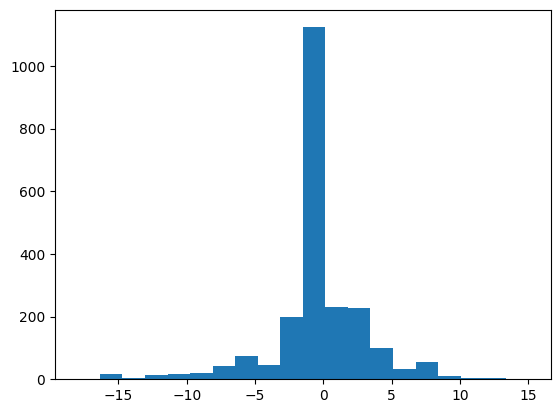

In [224]:
def get_labels_from_ratings(comments_df: pd.DataFrame, ratings_df: pd.DataFrame):
    merged = comments_df.merge(ratings_df, on="comment-id", how="inner")
    return merged["rating"].values, merged["comment-id"].values


labels_train, train_indices = get_labels_from_ratings(comments, ratings_train)
V_train_comments = np.nan_to_num(votes_matrix.values[:, train_indices], nan=0)
labels_train = np.nan_to_num(labels_train, nan=0)

labels_test, test_indices = get_labels_from_ratings(comments, ratings_test)
V_test_comments = np.nan_to_num(votes_matrix.values[:, test_indices], nan=0)
labels_test = np.nan_to_num(labels_test, nan=0)

p_labels = V_train_comments @ labels_train
print(labels_train.shape)
plt.hist(p_labels, bins=20)

Num top components: 1, Train R: 0.5833, Test R: 0.7362
Num top components: 2, Train R: 0.6364, Test R: 0.6819
Num top components: 3, Train R: 0.6373, Test R: 0.6806
Num top components: 5, Train R: 0.6410, Test R: 0.6734
Num top components: 10, Train R: 0.6627, Test R: 0.6773
Num top components: 20, Train R: 0.6806, Test R: 0.6800


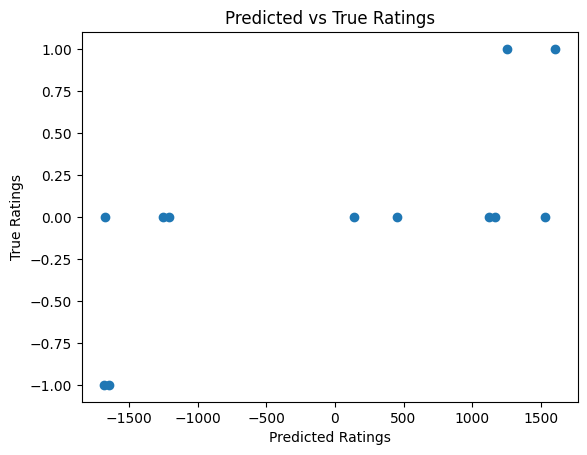

In [228]:
numiter = 20

decomposed_full, pca = decompose_votes(votes_matrix.values, num_components=30)

for numtop in [1, 2, 3, 5, 10, 20]:
    decomposed = decomposed_full[:, :numtop]

    model = LinearRegression()
    model.fit(decomposed, p_labels)

    pred = model.predict(decomposed)
    pred_p_labels = V_test_comments.T @ pred

    pred_labels_train = V_train_comments.T @ pred
    pred_labels_test = V_test_comments.T @ pred

    r_train.append(np.corrcoef(pred_labels_train, labels_train)[0, 1])
    r.append(np.corrcoef(pred_labels_test, labels_test)[0, 1])

    print(
        f"Num top components: {numtop}, Train R: {r_train[-1]:.4f}, Test R: {r[-1]:.4f}"
    )

plt.scatter(pred_labels_test, labels_test)
plt.xlabel("Predicted Ratings")
plt.ylabel("True Ratings")
plt.title("Predicted vs True Ratings")
plt.show()

In [230]:
model = LinearRegression()
model.fit(decomposed_full[:, :4], p_labels)

pred = model.predict(decomposed_full[:, :4])
votes_matrix_nonan = np.nan_to_num(votes_matrix.values, nan=0)
pred_labels = votes_matrix_nonan.T @ pred / np.sum(~np.isnan(votes_matrix.values), axis=0)

comments_by_pred = pd.DataFrame(
    {
        "comment-id": votes_matrix.columns.astype(int).tolist(),
        "predicted_rating": pred_labels,
    }
).merge(comments, on="comment-id")

sorted_comments = comments_by_pred.sort_values("predicted_rating", ascending=False)
sorted_comments

,comment-id,predicted_rating,timestamp,datetime,author-id,agrees,disagrees,moderated,comment-body,translated_comment
155,155,11.358149,1439908241,Tue Aug 18 2015 14:30:41 GMT+0000 (Coordinated...,923,1,0,-1,UBER跟網拍或共乘網都一樣是資訊服務的媒合平臺 交通部根本沒資格管,UBER is a matchmaking platform for information...
89,89,7.939455,1437622507,Thu Jul 23 2015 03:35:07 GMT+0000 (Coordinated...,852,1,0,-1,我覺得我很喜歡UBer的服務,I think I like UBer’s service very much
107,107,7.342583,1437808920,Sat Jul 25 2015 07:22:00 GMT+0000 (Coordinated...,1084,1,0,-1,我覺得 Uber X 的機制，在品質與安全上，對乘客的保障比一般計程車好,I think Uber X’s mechanism protects passengers...
136,136,7.075415,1438227483,Thu Jul 30 2015 03:38:03 GMT+0000 (Coordinated...,2389,1,0,-1,Uber是一個比計程車安全也方便的服務，應該要讓更新計程車的管理和營運方式，而不是墨守幾十年...,Uber is a service that is safer and more conve...
11,11,5.063650,1435656524,Tue Jun 30 2015 09:28:44 GMT+0000 (Coordinated...,2,1,0,-1,我喜歡講個秘訣,I like to tell a secret
...,...,...,...,...,...,...,...,...,...,...
47,47,-7.023754,1437441251,Tue Jul 21 2015 01:14:11 GMT+0000 (Coordinated...,460,1,0,-1,我覺得UberX只是個披羊皮的狼 / 因為感覺表面是為了大眾 / 背地裡卻是以不合法掩飾鑽法...,I think UberX is just a wolf in sheep’s clothi...
49,49,-7.401314,1437442132,Tue Jul 21 2015 01:28:52 GMT+0000 (Coordinated...,464,1,0,-1,"大台北計程車的數量已經夠多了, 滿街的計程車, 加上便捷的大眾運輸工具(如:捷運/ 公車/ ...",The number of taxis in Greater Taipei is alrea...
54,54,-7.487690,1437458101,Tue Jul 21 2015 05:55:01 GMT+0000 (Coordinated...,485,1,0,-1,雖然他類似資訊的媒合平台\n但牽扯到載客和交通法規\n這部分的確需要特別的嚴謹\n就像食品與...,Although it is similar to an information match...
22,22,-10.494370,1437097446,Fri Jul 17 2015 01:44:06 GMT+0000 (Coordinated...,88,1,0,-1,我覺得每位司機都該投保乘客責任險,I think every driver should have passenger lia...


In [231]:
sorted_comments.to_csv("../data/vtaiwan/comments_sorted_by_predicted_rating.csv", index=False)